# Predicting Heart Disease

**Create a Machine Learning Model capable of Predicting Presence of Heart Disease based on their Medical Attributes.**

### Problem Definition : Based on Medical Features, Predict whether the Patient have Heart Disease or not.

### Data : Heart Disease UCI : ( [The Orignal Data Set](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)  |  [Kaggle Data Set](https://www.kaggle.com/ronitf/heart-disease-uci) )

### Features : Data Dictionary : List of Features
* **Age**
* **Sex** : 1 - Male; 0 - Female
* **Chest Pain Type** (4 values)
* **Resting Blood Pressure**
* **Serum Cholestoral** in mg/dl
* **Fasting Blood Sugar** in mg/dl
* **Resting Electrocardiographic Results** (values 0,1,2)
* **Maximum Heart Rate Achieved** : Thalach
* **Exercise Induced Angina**
* **Oldpeak** : ST Depression induced by Exercise Relative to Rest
* **The Slope of the Peak Exercise ST Segment**
* **Number of Major Vessels** (0-3) Colored by Flourosopy
* **Thalassemia** : 3 - Normal; 6 - Fixed Defect; 7 - Reversable Defect.
* **Target : 1 - Heart Diseased; 0 - Not Heart Diseased.**

**Import Libraries for Data Manipulation and Exploratory Data Analysis**

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import numpy as np
import pandas as pd

**Import Library for Data Visualization**

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

**Import Libraries for Creating Model**

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

**Import Libraries for Model Evaluations**

**Model Selection :**
1. **Train Test Split**
2. **Cross Validation**
3. **Randommized Search Cross Validation**
4. **Grid Search Cross Validation**

**Classification Evaluation Metrics :**
1. **Accuracy Score**
2. **Precision Score**
3. **Recall Score**
4. **F1 Score**
5. **Receiver Operating Characteristics Curve**
6. **Area Under Curve Score**

In [5]:
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve,roc_auc_score

**Load Data Set**

In [6]:
Heart =pd.read_csv('Heart Disease.csv')

Heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
print(Heart.shape)

(303, 14)


### Exploratory Data Analysis

**Check whether Target Variable has Balanced or Imbalanced Classification.**

In [8]:
print(Heart['target'].value_counts())

1    165
0    138
Name: target, dtype: int64


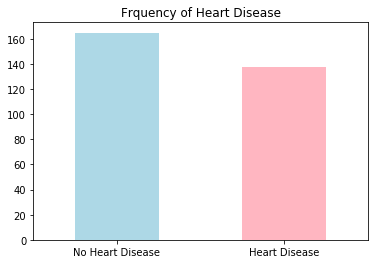

In [9]:
Heart['target'].value_counts().plot(kind = 'bar', color = ['lightblue','lightpink'])
plt.title('Frquency of Heart Disease')
plt.xticks(np.arange(2),['No Heart Disease', 'Heart Disease'], rotation = 0);

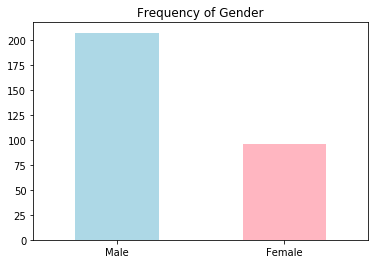

In [10]:
Heart['sex'].value_counts().plot(kind = 'bar', color = ['lightblue','lightpink']);
plt.title('Frequency of Gender')
plt.xticks(np.arange(2),['Male', 'Female'],rotation = 0);

**Check Data Type, Columns, Missing Values, Types of Data in the Data Set**

In [11]:
print(Heart.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


**All Feature are Numerical in the Data Set, and No Missing Values.**

In [12]:
print(Heart.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

**Compare Features to Find Patterns.**

**Data Visualization Helps us to Find Patterns which are not visible easily in Tabular Format.**

**Age Distribution**

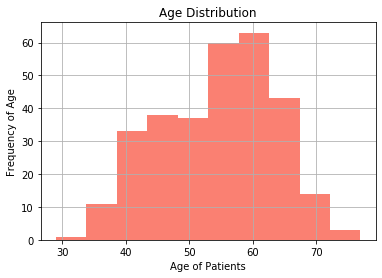

In [13]:
Heart['age'].hist(color = 'salmon')
plt.title('Age Distribution')
plt.xlabel('Age of Patients')
plt.ylabel('Frequency of Age');

**Compare Sex with Target Feature using Cross Tab**

In [14]:
print(Heart['sex'].value_counts())
print()
print(pd.crosstab(Heart['target'], Heart['sex'],margins=True))

1    207
0     96
Name: sex, dtype: int64

sex      0    1  All
target              
0       24  114  138
1       72   93  165
All     96  207  303


In [15]:
print(pd.crosstab(Heart['target'],Heart['sex']).apply(lambda r : round(r/r.sum(),2))*100)

sex        0     1
target            
0       25.0  55.0
1       75.0  45.0


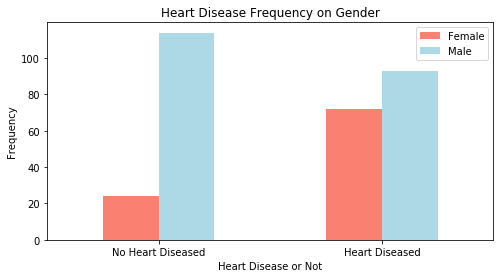

In [16]:
pd.crosstab(Heart['target'], Heart['sex']).plot(kind = 'bar', color = ['salmon','lightblue'], figsize = (8,4))
plt.title('Heart Disease Frequency on Gender')
plt.xlabel('Heart Disease or Not')
plt.ylabel('Frequency')
plt.xticks(np.arange(2),('No Heart Diseased', 'Heart Diseased'),rotation = 0)
plt.legend(['Female', 'Male']);

**Comparing Age with Maximum Heart Rate Achieved, to find Pattern of Heart Rates on the Basis of Patient's Age**

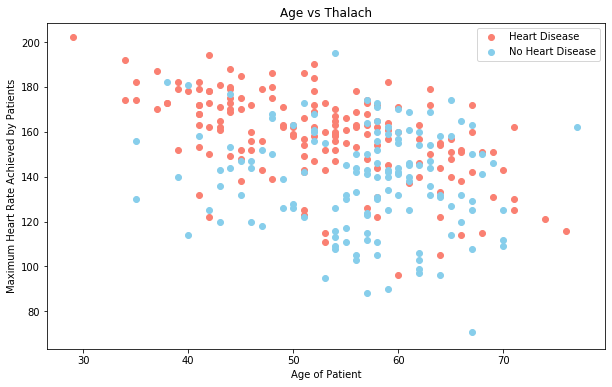

In [17]:
plt.figure(figsize=(10,6))

# With Heart.
plt.scatter(Heart['age'][Heart['target'] == 1], Heart['thalach'][Heart['target'] == 1], color = 'salmon')

# With No Heart Disease.
plt.scatter(Heart['age'][Heart['target'] == 0], Heart['thalach'][Heart['target'] == 0], color = 'skyblue')

plt.title('Age vs Thalach')
plt.xlabel('Age of Patient')
plt.ylabel('Maximum Heart Rate Achieved by Patients')
plt.legend(['Heart Disease', 'No Heart Disease']);
# Age of Patients with Maximum Heart Rate Achieved and having Heart Disease.

**We can Conclude that Younger Patients have Higher Heart Rates, the Scatter Plot is showing Downward Slope.**

**Heart Disease Frequency on the basis of Chest Pain Type**

| **Value** | **Chest Pain Type** |
| --- | --- | 
| **0** | **Typical Angina**
| **1** | **Atypical Angina** | 
| **2** | **Non Anginal** |
| **3** | **Asymptomatic** |

In [18]:
print(pd.crosstab(Heart['cp'], Heart['target'], 
                  rownames=['Chest Pain'], colnames=['Disease'], 
                  margins=True, margins_name='Total'))

Disease       0    1  Total
Chest Pain                 
0           104   39    143
1             9   41     50
2            18   69     87
3             7   16     23
Total       138  165    303


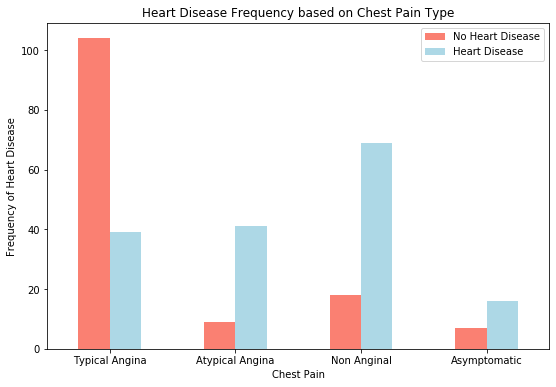

In [19]:
pd.crosstab(Heart['cp'], Heart['target']).plot(kind = 'bar', color = ['salmon', 'lightblue'], figsize = (9,6))
plt.title('Heart Disease Frequency based on Chest Pain Type')
plt.xlabel('Chest Pain')
plt.ylabel('Frequency of Heart Disease')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.xticks(np.arange(4),['Typical Angina', 'Atypical Angina', 'Non Anginal', 'Asymptomatic'], rotation = 0);

**Correlation Matrix**

In [20]:
Heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
Heart.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


**Correlation Heatmap**

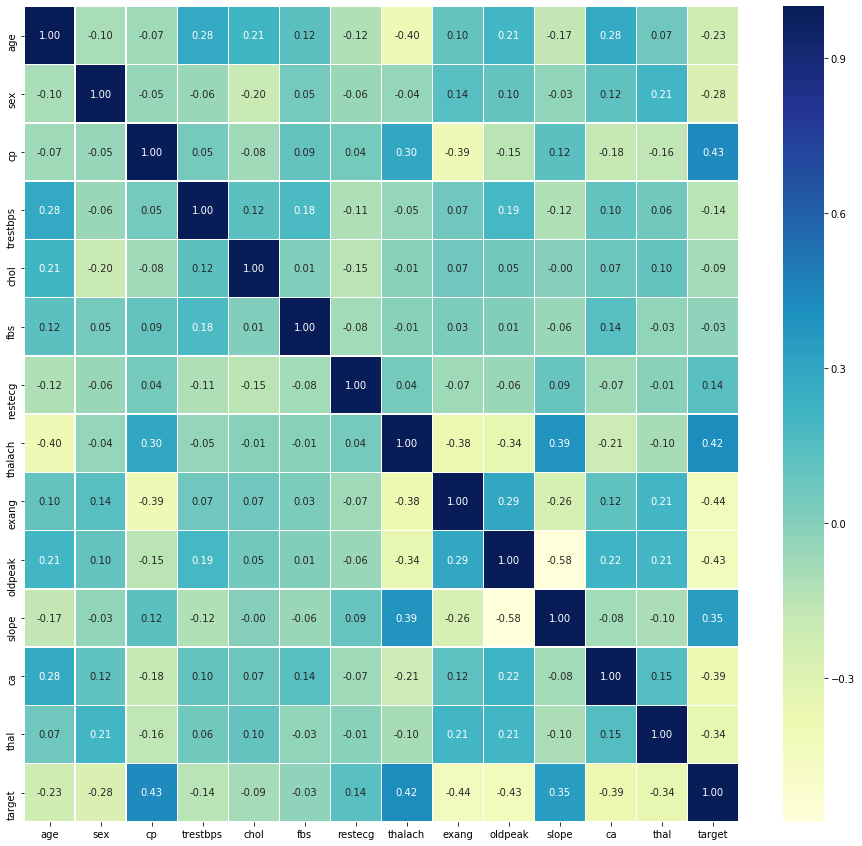

In [22]:
Fig, Axes = plt.subplots(figsize = (16, 15))
Axes = sns.heatmap(Heart.corr(), annot = True, linewidths = 0.5, fmt = '.2f', cmap = 'YlGnBu')

# Adjusting the Broken Map :
Bottom, Top = Axes.get_ylim()
Axes.set_ylim(Bottom + 0.5, Top - 0.5);

### 5.Data Modelling

In [23]:
Heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Split Data into Independent Features ( X ) and Dependent Feature ( Y )**

In [24]:
X = Heart.drop('target', axis = 'columns')
Y = Heart['target']

**Split the Data into Test Set and Test Set**

In [25]:
# Set Random Seed for Reproducible Results.
np.random.seed(777)

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.2)

**X_Train : Set of Data used to Train the Model**

**Y_Train : Set of Labels of Corresponding X_Train Data, Trained along with X_Train to Find Patterns between both Sets.**

**X_Test : Set of Data used for Testing Model**

**Y_Test : Set of Labels of X_Test Data used to Compare with the Predictions after Training Model to Improve and Evaluate Model.**

****
### Machine Learning Model's 

1. **Logistic Regression**
2. **K Nearest Neighbors**
3. **Random Forest Classifier**

In [26]:
Models = {'Logistic Regression' : LogisticRegression(),
          'K Nearest Neighbors' : KNeighborsClassifier(),
          'Random Forest Classifier' : RandomForestClassifier()}

**Create a Function to Fit and Score Models**

In [27]:
def Fit_Score(Model, X_Train, X_Test, Y_Train, Y_Test) : 
    '''
    Train and Evaluate the given Machine Learning Model :
    
    Parameters 
    ----------
    
    Models : Machine Learning Model.
    
    X_Train : Set of Data to Train the Machine Learning Model.
    
    X_Test : Set of Data to Test the Machine Learning Model.
    
    Y_Train : Set of Data (Labels) of Corresponding Train Set.
    
    Y_Test : Set of Data (Labels) for Comparison and Evaluation of Predictions made by  Machine Learning Model's. 
    
    '''
    # Set Random Seed for Reproducible Results.
    np.random.seed(777) 
    
    # A Dictionary to Keep Model Scores.
    Model_Score = {} 
    
    # Loop for Models.
    for Name, Model in Models.items() :
        
        # Fit the Model and Find Pattern in the Data.
        Model.fit(X_Train, Y_Train)
        
        # Add New Key to Dictionary = Evaluate the Model (Use the Patterns)and Append it's Score to Model_Score
        Model_Score[Name] = Model.score(X_Test, Y_Test)
    
    return Model_Score

In [28]:
Model_Score = Fit_Score(Models, X_Train, X_Test, Y_Train, Y_Test)

Model_Score

{'Logistic Regression': 0.8524590163934426,
 'K Nearest Neighbors': 0.639344262295082,
 'Random Forest Classifier': 0.7704918032786885}

### Model Score Comparison

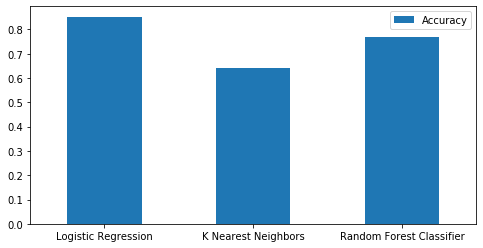

In [29]:
Compare = pd.DataFrame(Model_Score, index = ['Accuracy'])

Compare.T.plot.bar(figsize=(8,4))
plt.xticks(rotation = 0 );

**Logistic Regression is Performing Better than the K Nearest Neighbors and Random Forest Classifier.**

**Improving Models may help us to Reach the Desired Machine Learning Model.**

**First Improving K Nearest Neighbors**

****

### Hyperparameter Tuning

In [30]:
# Empty list
Train_Score = []
Test_Score = []

# Create a List of Different Values for n_neighbors :
Neighbors = range(1, 21)

# Setup K Nearest Neighbor Instance :
KNN = KNeighborsClassifier()

# Loop through Neighbors :
for n in Neighbors :
    KNN.set_params(n_neighbors = n)
    
    # Fit the Model :
    KNN.fit(X_Train, Y_Train)
    
    # Update Train Score List : 
    Train_Score.append(KNN.score(X_Train, Y_Train))
    
    # Update Test Score List :
    Test_Score.append(KNN.score(X_Test, Y_Test))
    
# Best Scores :

print(f'Best Train Score : {max(Train_Score)*100:.2f}%')
print()
print(f'Best Test Score : {max(Test_Score)*100:.2f}%')

Best Train Score : 100.00%

Best Test Score : 67.21%


**Better than Previous**

**Lets Visualize it for Better Understanding**

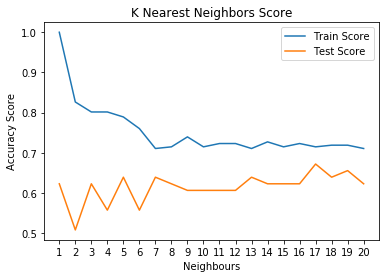

In [31]:
plt.title('K Nearest Neighbors Score')
plt.plot(Neighbors, Train_Score, label = 'Train Score')
plt.plot(Neighbors, Test_Score, label = 'Test Score')
plt.xlabel('Neighbours')
plt.ylabel('Accuracy Score')
plt.legend()
plt.xticks(range(1,21));

**Hyperparameter Tuning Improved the Model but still the Accuracy is not what we Expect.**

** **

### Randomized Search Cross Validation

**Improve Logistic Regression and Random Forest Classifier, we may get the Desired Accuracy.**

**Create a Hyperparameter Grid for Logistic Regression.**

In [32]:
LR_Parameters_Grid = {'C' : np.logspace(-4, 4, 20), 'solver' : ['liblinear']}  

**Tune Logistic Regression**

In [33]:
# Set Random Seed for Reproducible Results :
np.random.seed(777)

**Set Randomized Search Cross Validation for Logistic Regression**

In [34]:
RSCV_LR = RandomizedSearchCV(LogisticRegression(),
                             param_distributions = LR_Parameters_Grid,
                             cv = 5,
                             n_iter = 20,
                             verbose = True)

**Fit Randomized Search Cross validation fot Logistic Regression.**

In [35]:
RSCV_LR.fit(X_Train, Y_Train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
C:\Users\kisan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=20, n_jobs=None,
                   param_distributi...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

**Best Parameter Received**

In [36]:
print(RSCV_LR.best_params_)

{'solver': 'liblinear', 'C': 1.623776739188721}


**Logistic Regression Score on Test Data**

In [37]:
print(RSCV_LR.score(X_Test, Y_Test))

0.8524590163934426


**Create a Hyperparameter Grid for Random Forest Classifier**

In [38]:
RF_Parameters_Grid = {'n_estimators' : np.arange(10, 1000, 50), 
                      'max_depth' : [None, 3, 5, 10],
                      'min_samples_split' : np.arange(2, 20, 2),
                      'min_samples_leaf' : np.arange(1, 20, 2)}

**Tune Random Forest Classifier**

In [39]:
# Set Random Seed for Reproducible Results 
np.random.seed(777)

**Set Randomized Search Cross Validation for Random Forest Classifier**

In [40]:
RSCV_RFC = RandomizedSearchCV(RandomForestClassifier(),
                             param_distributions = RF_Parameters_Grid,
                             cv = 5,
                             n_iter = 20,
                             verbose = True)

**Fit Randomized Search Cross Validation for Random Forest Classifier.**

In [41]:
RSCV_RFC.fit(X_Train, Y_Train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.2min finished
C:\Users\kisan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

**Best Parameters Received**

In [42]:
print(RSCV_RFC.best_params_)

{'n_estimators': 260, 'min_samples_split': 10, 'min_samples_leaf': 11, 'max_depth': None}


**Random Forest Classifier Score on Test Data**

In [43]:
print(RSCV_RFC.score(X_Test, Y_Test))

0.8524590163934426


**Randomized Search Cross validation Improved the Random Forest Classifier Model but still the Accuracy is not what we Expect.**

****
### Grid Search Cross Validation

**Improve Logistic Regression Model using Grid Search Cross Validation.**

**Create Hyperparameter Grid for Logistic Regression.**

In [44]:
LR_Parameters_Grid = {'C' : np.logspace(-4, 4, 30), 'solver' : ['liblinear']}  

**Set Grid Search Cross validation for Logistic Regression Model.**

In [45]:
GSCV_LR = GridSearchCV(LogisticRegression(),
                       param_grid = LR_Parameters_Grid,
                       cv = 5,
                       verbose = True)

**Fit Grid Search Cross Validation for Logistic Regression Model**

In [46]:
GSCV_LR.fit(X_Train, Y_Train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.0s finished
C:\Users\kisan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.0000000...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.

**Best Parameters Received**

In [47]:
print(GSCV_LR.best_params_)

{'C': 1.3738237958832638, 'solver': 'liblinear'}


**Logistic Regression Score on Test Data**

In [48]:
print(GSCV_LR.score(X_Test, Y_Test))

0.8524590163934426


**After using Randomized Search Cross Validation and Grid Search Cross Validation for Logistic Regression, the Scores obtained are the Same.**

****
### Evaluating the Tuned Logistic Regression Model :

* **ROC Curve**
* **Area Under the Curve (AUC)**
* **Confusion Matrix**
* **Cross Validation**
* **Classification Report ( Precision Score, Recall Score, F1 Score)**

****

**Making Prediction to Compare and Evaluate our Trained Logistic Regression Model**

In [49]:
GSCV_LR_Prediction = GSCV_LR.predict(X_Test)

**Plot Receiver Operating Characteristic : ROC Curve (TPR vs FPR at various Thresholds) and Area Under Curve (AUC)**

1. **True Positive : Model Predicts 1 when Truth is 1**

2. **False Positive : Model Predicts 1 when Truth is 0**

3. **True Negative : Model Predicts 0 when Truth is 0**

4. **False Negative : Model Predicts 0 when Truth is 1**

**Make Predictions with Probabilities**

In [50]:
GSCV_LR_Probability = GSCV_LR.predict_proba(X_Test)

**We only want Probability of Positive Class for True Positive Rate.**

In [51]:
Positive_Probability = GSCV_LR_Probability[:,1]

**Calculate True positive Rate (TPR). False Positive Rate (FPR) and Thresholds.**

In [52]:
FPR, TPR, Thresholds = roc_curve(Y_Test, Positive_Probability)

**Create Function for Plotting ROC Curve**

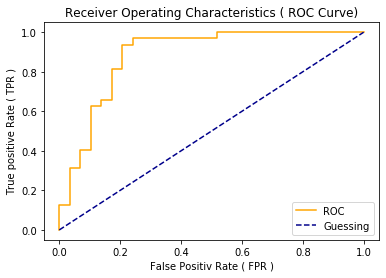

In [53]:
def Plot_ROC_Curve(FPR, TPR) :
    '''
    
    Plot the Receiver Operating Characteristics : ROC Curve
    
    Parameter 
    ---------
    
    FPR : False Positive Rate
    
    TPR : True Positive Rate
    
    '''
    
    # Plot ROC Curve
    plt.plot(FPR, TPR, color = 'orange', label = 'ROC')
    
    # Plot Line with No Predictive Power (Baseline)
    plt.plot([0,1],[0,1], color = 'darkblue', linestyle = '--', label = 'Guessing')
    
    # Customize the Plot 
    plt.title('Receiver Operating Characteristics ( ROC Curve)')
    plt.xlabel('False Positiv Rate ( FPR )')
    plt.ylabel('True positive Rate ( TPR )')
    plt.legend()
    plt.show()
    
Plot_ROC_Curve(FPR, TPR)

**Area Under Curve ( AUC Score )**

In [54]:
print(f'Area Under Curve Score : {roc_auc_score(Y_Test, Positive_Probability)*100:.2f}%')

Area Under Curve Score : 88.36%


**Perfect ROC Curve and AUC Score looks like**

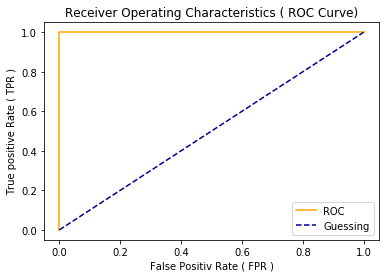

Perfect AUC Score : 100.0%


In [55]:
FPR, TPR, Thresholds = roc_curve(Y_Test, Y_Test)
Plot_ROC_Curve(FPR,TPR)
print(f'Perfect AUC Score : {roc_auc_score(Y_Test, Y_Test)*100}%')

**Confusion Matrix**

In [56]:
print(f'Confusion Matrix : \n{confusion_matrix(Y_Test, GSCV_LR_Prediction)}' )

Confusion Matrix : 
[[23  6]
 [ 3 29]]


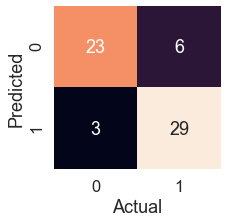

In [57]:
sns.set(font_scale = 1.5)

def Plot_Confusion_Matrix (Y_Test, Prediction) : 
    '''
    
    Plot Confusion Matrix using Seaborn's Heat Map
    
    Parameter
    ---------
    
    Y_Test : Set of Test  Labels
    
    Prediction : Prediction made by Machine Learning Model
    
    '''
    
    Fig, Axes = plt.subplots(figsize = (3,3))
    
    Axes = sns.heatmap(confusion_matrix(Y_Test, Prediction), annot = True, cbar = False)
    
    plt.xlabel('Actual')
    
    plt.ylabel('Predicted')
    
    # Fix the Broken Heatmap :
    Bottom, Top  = Axes.get_ylim()
    
    Axes.set_ylim(Bottom + 0.5, Top - 0.5)
    
Plot_Confusion_Matrix(Y_Test, GSCV_LR_Prediction)

****
### Classification Report :

* **A Model that Predicts Zero False Positive has the Precision Score of 100%**

* **A Model that Predicts Zero False Negative has the Recall Score of 100%**

* **A Model that Predicts Zero False Positive and Zero False Negative has the F1 Score of 100%**

* **Macro Average : Average of Precision, Recall and F1 Scores between Classes.**

* **Macro Average does not take Imbalanced Class.**

* **Weighted Average is Biased to the Class with More Samples.**

In [58]:
print(f'Classification Report of Logistic Regression : \n{classification_report(Y_Test, GSCV_LR_Prediction)}')

Classification Report of Logistic Regression : 
              precision    recall  f1-score   support

           0       0.88      0.79      0.84        29
           1       0.83      0.91      0.87        32

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



**Above Classification Report is Calculated on the Basis of Only one Train and Test Split.**

****

**Cross Validation of Accuracy, Precision Score, Recall Score and F1 Score.**

**Create Cross Validation on the basis of Best Parameters.**

In [59]:
print(GSCV_LR.best_params_)

{'C': 1.3738237958832638, 'solver': 'liblinear'}


**Create  a Classifier using Best Parameters :**

In [60]:
CV_Model = LogisticRegression(C = 0.1082636733874054, solver = 'liblinear')

**Cross Validated Accuracy**

In [61]:
CV_Accuracy = cross_val_score(CV_Model, X, Y, cv = 5, scoring = 'accuracy')

CV_Accuracy = np.mean(CV_Accuracy)

print(f'Cross Validated Accuracy : {CV_Accuracy * 100:.2f}%')

Cross Validated Accuracy : 83.48%


**Cross Validated Precision Score**

In [62]:
CV_Precision_Score = cross_val_score(CV_Model, X, Y, cv = 5, scoring = 'precision')

CV_Precision_Score = np.mean(CV_Precision_Score)

print(f'Cross Validated Precision Score : {CV_Precision_Score * 100:.2f}%')

Cross Validated Precision Score : 81.83%


**Cross Validated Recall Score**

In [63]:
CV_Recall_Score = cross_val_score(CV_Model, X, Y, cv = 5, scoring = 'recall')

CV_Recall_Score = np.mean(CV_Recall_Score)

print(f'Cross Validated Recall Score : {CV_Recall_Score * 100:.2f}%')

Cross Validated Recall Score : 90.30%


**Cross Validated F1 Score**

In [64]:
CV_F1_Score = cross_val_score(CV_Model, X, Y, cv = 5, scoring = 'f1')

CV_F1_Score = np.mean(CV_F1_Score)

print(f'Cross Validated F1 Score : {CV_F1_Score * 100:.2f}%')

Cross Validated F1 Score : 85.73%


**Visualize Cross Validated Metrics.**

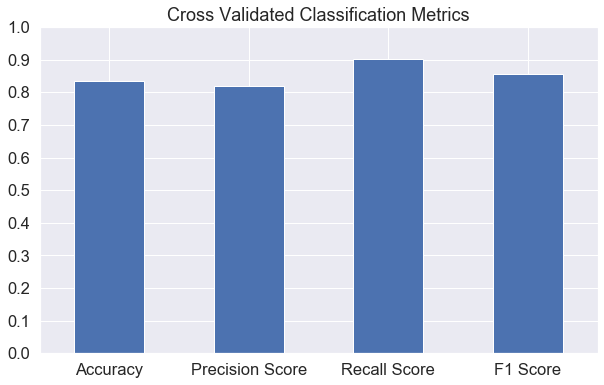

In [65]:
CV_Metrics = pd.DataFrame({'Accuracy' : CV_Accuracy,
                           'Precision Score' : CV_Precision_Score,
                           'Recall Score' : CV_Recall_Score,
                           'F1 Score' : CV_F1_Score},
                           index=[0])

CV_Metrics.T.plot.bar(title = 'Cross Validated Classification Metrics', legend = False, figsize = (10, 6))
plt.xticks(rotation = 0)
plt.yticks(np.arange(0,1.1,0.1));

****
### Feature Importance

**Features that are Important for Better Predictions**

**Feature Importance for Logistic Regression**

In [66]:
# Fit the Instance of Logistc Regression using its Best Parameters.
# GSCV_LR.best_params_

LR = LogisticRegression(C = 0.1082636733874054, solver = 'liblinear')

LR.fit(X_Train, Y_Train)

LogisticRegression(C=0.1082636733874054, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
Heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Coefficients**

In [68]:
print(LR.coef_)

[[ 5.93359059e-04 -6.02491422e-01  6.81423699e-01 -1.74262503e-02
  -3.33951929e-03 -2.58205647e-02  2.80900569e-01  2.74133906e-02
  -3.76898676e-01 -4.10792546e-01  4.54412381e-01 -4.98349479e-01
  -4.51946273e-01]]


In [69]:
Feature_Dict = dict(zip(Heart.columns, list(LR.coef_[0])))
print(Feature_Dict)

{'age': 0.0005933590589040164, 'sex': -0.6024914216907581, 'cp': 0.6814236989868261, 'trestbps': -0.017426250347951363, 'chol': -0.0033395192890338567, 'fbs': -0.02582056473898319, 'restecg': 0.28090056923908296, 'thalach': 0.027413390615996052, 'exang': -0.37689867551015044, 'oldpeak': -0.410792545767926, 'slope': 0.45441238056554184, 'ca': -0.4983494789292277, 'thal': -0.4519462725894397}


**Viualize Feature Importance**

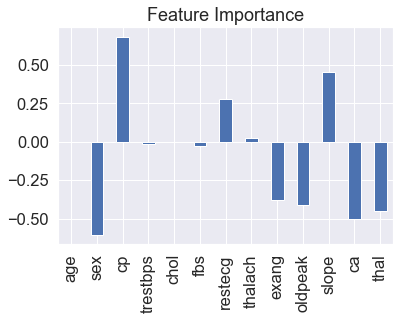

In [70]:
Feature = pd.DataFrame(Feature_Dict, index=[0])
Feature.T.plot.bar(title = 'Feature Importance', legend = False);

**Feature Importance means we have to Find the Features that are Highly Correlated with the Target Variable.**
****
## Experimentation

**If You have not Reached to your Expected Evaluation Metric :**

1. **Collect some more Data if Possible.**

2. **Try to Explore other Machine Learning Model.**  

3. **Improve Current Model, Experiment with the Hyperparameters.**
